##### In order to run the bellow cells, download Amazon datasets for electronics from https://amazon-reviews-2023.github.io/main.html and place them in the ```/data``` folder.

In [1]:
import json
import pandas as pd

## Filter Items that have been observed for the first time in year 2022 or later.

In [2]:
def filter_data(data: dict) -> dict:
    filter = False
    if int(data['details']['Date First Available'][-4:]) < 2022:
        filter = True

    return filter

In [3]:
with open("../../data/meta_Electronics.jsonl", 'r') as fp:
    with open("../../data/meta_Electronics_2022_2023.jsonl", 'a', encoding='utf-8') as fp_out:
        with open("../../data/meta_Electronics_2022_2023_no_date.jsonl", 'a', encoding='utf-8') as fp_out_no_date:
            i = 0
            for line in fp:
                data = json.loads(line.strip())
                try:
                    filter = filter_data(data)
                    if not filter:
                        json.dump(data, fp_out)
                        fp_out.write('\n')
                        fp_out.flush()
                except:
                    json.dump(data, fp_out_no_date)
                    fp_out_no_date.write('\n')
                    fp_out_no_date.flush()
                i += 1
                if i % 10000 == 0:
                    print(f"Processed {i} lines")

Processed 10000 lines
Processed 20000 lines
Processed 30000 lines
Processed 40000 lines
Processed 50000 lines
Processed 60000 lines
Processed 70000 lines
Processed 80000 lines
Processed 90000 lines
Processed 100000 lines
Processed 110000 lines
Processed 120000 lines
Processed 130000 lines
Processed 140000 lines
Processed 150000 lines
Processed 160000 lines
Processed 170000 lines
Processed 180000 lines
Processed 190000 lines
Processed 200000 lines
Processed 210000 lines
Processed 220000 lines
Processed 230000 lines
Processed 240000 lines
Processed 250000 lines
Processed 260000 lines
Processed 270000 lines
Processed 280000 lines
Processed 290000 lines
Processed 300000 lines
Processed 310000 lines
Processed 320000 lines
Processed 330000 lines
Processed 340000 lines
Processed 350000 lines
Processed 360000 lines
Processed 370000 lines
Processed 380000 lines
Processed 390000 lines
Processed 400000 lines
Processed 410000 lines
Processed 420000 lines
Processed 430000 lines
Processed 440000 lin

## Split the items into two categories: "has main category", "does not have main category"

In [4]:
def filter_category(data: dict) -> dict:
    filter = False
    if data['main_category'] == None:
        filter = True

    return filter

In [5]:
with open("../../data/meta_Electronics_2022_2023.jsonl", 'r') as fp:
    with open("../../data/meta_Electronics_2022_2023_with_category.jsonl", 'a', encoding='utf-8') as fp_out:
        with open("../../data/meta_Electronics_2022_2023_no_category.jsonl", 'a', encoding='utf-8') as fp_out_no_category:
            for line in fp:
                data = json.loads(line.strip())
                if not filter_category(data):
                    json.dump(data, fp_out)
                    fp_out.write('\n')
                    fp_out.flush()
                else:
                    json.dump(data, fp_out_no_category)
                    fp_out_no_category.write('\n')
                    fp_out_no_category.flush()

## Explore dsitribution by categories

In [6]:
df = pd.read_json("../../data/meta_Electronics_2022_2023_with_category.jsonl", lines=True)

Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='main_category'>

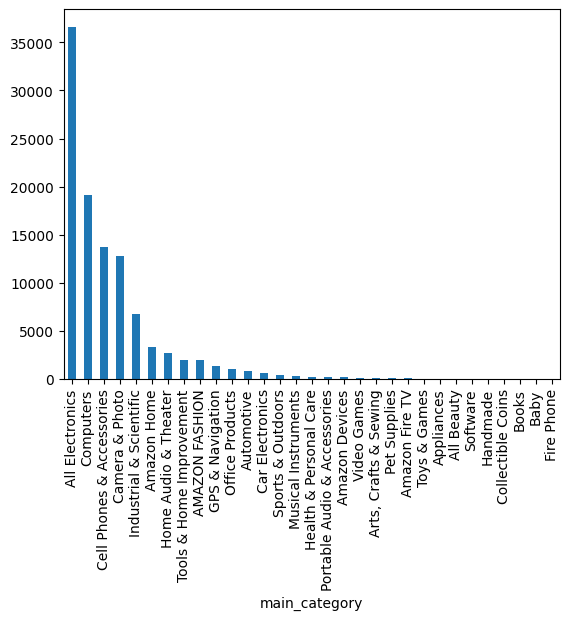

In [8]:
df['main_category'].value_counts().plot(kind='bar')

### Filter out items that have at least 100 ratings

In [9]:
df_ratings_100 = df[df['rating_number'] > 100]

## Explore distribution of ratings

<Axes: ylabel='Frequency'>

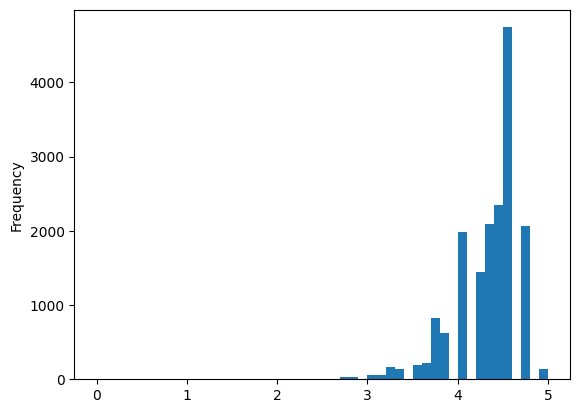

In [10]:
df_ratings_100['average_rating'].plot(kind='hist', bins=50, range=(0, 5))

#### Sample 1000 items

In [11]:
df_sample_1000 = df_ratings_100.sample(n=1000, random_state=20)

<Axes: ylabel='Frequency'>

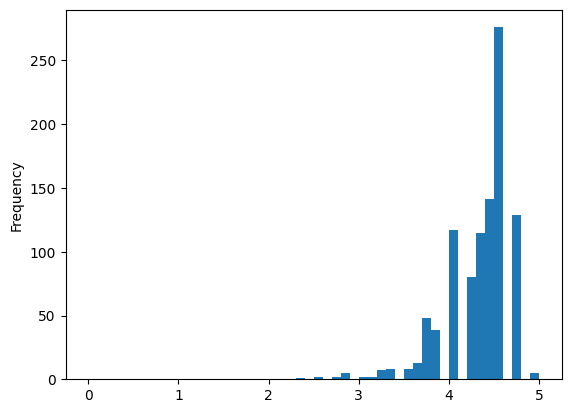

In [12]:
df_sample_1000['average_rating'].plot(kind='hist', bins=50, range=(0, 5))

<Axes: ylabel='Frequency'>

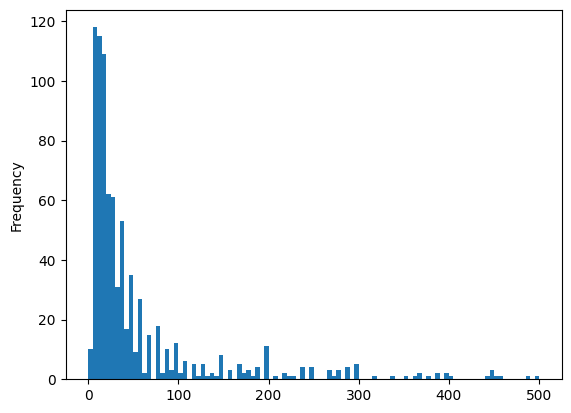

In [13]:
df_sample_1000['price'].plot(kind='hist', bins=100, range=(0, 500))

In [14]:
df_ratings_100.to_json("../../data/meta_Electronics_2022_2023_with_category_ratings_100.jsonl", orient='records', lines=True)

In [15]:
df_sample_1000.to_json("../../data/meta_Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl", orient='records', lines=True)

## Examine correlations between ratings and price.

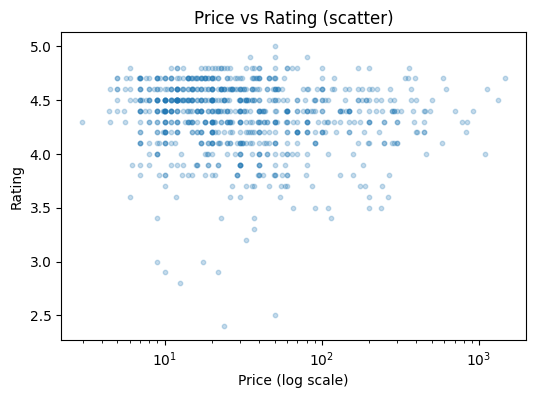

In [ ]:
# Examine correlations between ratings and price.
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
price_col = "price"
rating_col = "average_rating"


def parse_price(x):
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return np.nan
    s = str(x)
    s = s.replace("$", "").replace(",", "").strip()
    try:
        return float(s)
    except ValueError:
        return np.nan
df["price_num"] = df[price_col].apply(parse_price)
df["rating_num"] = pd.to_numeric(df[rating_col], errors="coerce")

df_clean = df[["price_num", "rating_num"]].dropna()
df_clean = df_clean[(df_clean["price_num"] > 0) & (df_clean["rating_num"] > 0)]
df_clean.head()
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df_clean["price_num"], df_clean["rating_num"], s=10, alpha=0.25)
ax.set_xscale("log")
ax.set_xlabel("Price (log scale)")
ax.set_ylabel("Rating")
ax.set_title("Price vs Rating (scatter)")
plt.show()

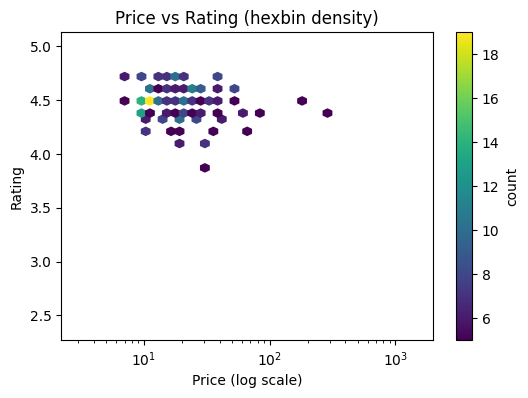

In [24]:
fig, ax = plt.subplots(figsize=(6, 4))
hb = ax.hexbin(df_clean["price_num"], df_clean["rating_num"], xscale="log", gridsize=40, mincnt=5, cmap="viridis")
ax.set_xlabel("Price (log scale)")
ax.set_ylabel("Rating")
ax.set_title("Price vs Rating (hexbin density)")
cb = fig.colorbar(hb, ax=ax)
cb.set_label("count")
plt.show()

/var/folders/hd/mwwk_4zs7blcj6tc0ycm9t5c0000gn/T/ipykernel_16259/1177882004.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_bin = df_clean.groupby("price_bin")["rating_num"].agg(["mean", "count"]).reset_index()


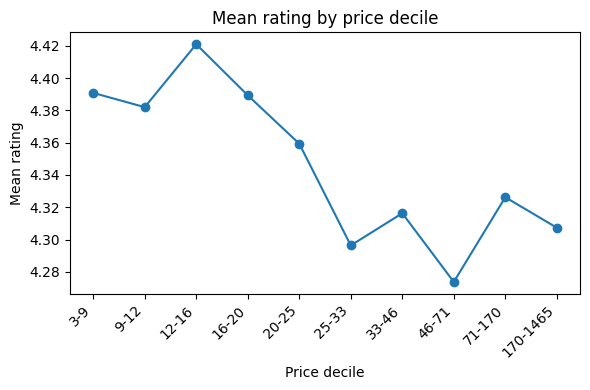

In [25]:
df_clean["price_bin"] = pd.qcut(df_clean["price_num"], q=10, duplicates="drop")
by_bin = df_clean.groupby("price_bin")["rating_num"].agg(["mean", "count"]).reset_index()

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(range(len(by_bin)), by_bin["mean"], marker="o")
ax.set_xticks(range(len(by_bin)))
ax.set_xticklabels([f"{b.left:.0f}-{b.right:.0f}" for b in by_bin["price_bin"].cat.categories], rotation=45, ha="right")
ax.set_xlabel("Price decile")
ax.set_ylabel("Mean rating")
ax.set_title("Mean rating by price decile")
plt.tight_layout()
plt.show()

## Identify popular items/categories based on review counts

In [29]:
# Top 20 most-reviewed items
cols_present = [c for c in ["title", "parent_asin", "main_category", "rating_number", "average_rating", "price"] if c in df.columns]
top_items = (
    df.sort_values("rating_number", ascending=False)
      .loc[:, cols_present]
      .head(20)
)
print("Top 20 most-reviewed items:")
display(top_items)

# Top categories by total number of reviews
if "main_category" in df.columns:
    top_categories = (
        df.groupby("main_category")["rating_number"]
          .sum()
          .sort_values(ascending=False)
          .head(20)
          .rename("total_reviews")
          .to_frame()
    )
    print("\nTop categories by total number of reviews:")
    display(top_categories)
else:
    print("Column 'main_category' not found in df.")


Top 20 most-reviewed items:


,title,parent_asin,main_category,rating_number,average_rating,price
275,Aioneus USB A to Type C Charger Cable 10ft 3Pa...,B0C7Q3X76Q,Cell Phones & Accessories,41057,4.5,10.99
301,"Acer SB242Y EBI 23.8"" Full HD (1920 x 1080) IP...",B0C2WWCBSG,Computers,40868,4.6,99.99
694,SanDisk 128GB Ultra Dual Drive Go USB Type-C F...,B0BR9135RC,Computers,26239,4.6,16.99
256,TCL 32-Inch Class HD 720p Smart LED TV Dolby D...,B0BBY5TGTM,All Electronics,21604,4.6,199.99
622,EMEET 1080P HD Webcam C960 Web Camera with Mic...,B0C4LKBK1Y,All Electronics,18751,4.3,42.99
57,"seenda Wireless Mouse, Rechargeable Light Up M...",B08M65W3PT,All Electronics,15931,4.6,14.99
669,TP-Link 2.5GB PCIe Network Card (TX201) – PCIe...,B0BJ1SLJH1,Computers,11929,4.6,26.99
742,"Smart Watch for Men Women, 2022 Fitness Tracke...",B0BXDDQPFX,All Electronics,11787,3.7,32.99
728,KAVNLON Electronics Indoor 6 PCS SD 1,B0BVVRSHQ5,All Electronics,11299,4.8,NaN
515,"Hicober USB C to SD Card Reader, Micro SD Memo...",B0B2JWCMCY,Computers,10942,4.5,16.99



Top categories by total number of reviews:


,total_reviews
main_category,
All Electronics,357428
Computers,203758
Cell Phones & Accessories,152014
Camera & Photo,49695
Industrial & Scientific,33871
Home Audio & Theater,21654
Office Products,8887
Amazon Home,5809
Automotive,5765


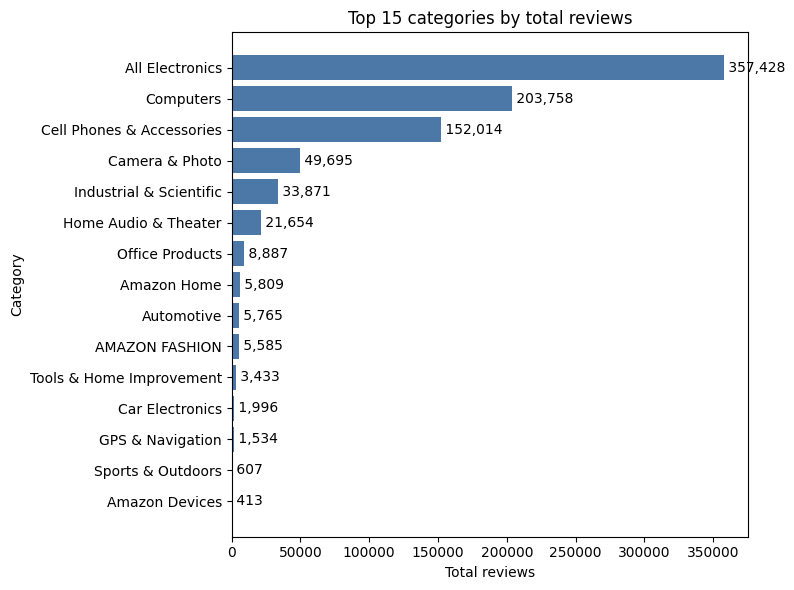

In [27]:
# Visualize top categories by total reviews
import matplotlib.pyplot as plt

cat_col = "main_category"
if cat_col in df.columns:
    cat_agg_plot = (
        df.groupby(cat_col)["rating_number"].sum()
          .sort_values(ascending=False)
          .head(15)
          .iloc[::-1]
    )

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.barh(cat_agg_plot.index, cat_agg_plot.values, color="#4C78A8")
    ax.set_xlabel("Total reviews")
    ax.set_ylabel("Category")
    ax.set_title("Top 15 categories by total reviews")
    for i, v in enumerate(cat_agg_plot.values):
        ax.text(v, i, f" {int(v):,}", va="center")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'main_category' not found in df.")


## Extract ratings that match sampled data.

In [16]:
df_ratings_100 = pd.read_json("../../data/meta_Electronics_2022_2023_with_category_ratings_100.jsonl", lines=True)
df_sample_1000 = pd.read_json("../../data/meta_Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl", lines=True)

In [17]:
with open("../../data/Electronics.jsonl", 'r') as fp:
    with open("../../data/Electronics_2022_2023_with_category_ratings_100.jsonl", 'a') as fp_out:
        id_list = set(df_ratings_100['parent_asin'].values)
        i = 0
        for line in fp:
            data = json.loads(line.strip())
            if data['parent_asin'] in id_list:
                json.dump(data, fp_out)
                fp_out.write('\n')
                fp_out.flush()
            i += 1
            if i % 100000 == 0:
                print(f"Processed {i} lines")

FileNotFoundError: [Errno 2] No such file or directory: '../../data/Electronics.jsonl'

In [ ]:
with open("../../data/Electronics_2022_2023_with_category_ratings_100.jsonl", 'r') as fp:
    with open("../../data/Electronics_2022_2023_with_category_ratings_100_sample_1000.jsonl", 'a') as fp_out:
        id_list = set(df_sample_1000['parent_asin'].values)
        i = 0
        for line in fp:
            data = json.loads(line.strip())
            if data['parent_asin'] in id_list:
                json.dump(data, fp_out)
                fp_out.write('\n')
                fp_out.flush()
            i += 1
            if i % 100000 == 0:
                print(f"Processed {i} lines")